# Análise de preços do mercados de ações com Python

## Bibliotecas importadas

In [162]:
import datetime
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix # matriz de dispersão
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
import yfinance as yf

In [130]:
plt.style.use('seaborn')

## _Download_ e Preparação dos dados

As datas de início e fim da pesquisa de preços são definidas abaixo:

In [2]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)

_Download_ dos dados:

In [3]:
tesla = yf.download('TSLA', start=start, end=end, progress=False)
ford = yf.download('F', start=start, end=end, progress=False)
gm = yf.download('GM', start=start, end=end, progress=False)

Conversão dos _dataframes_ para arquivos CSV para uso futuro:

In [30]:
company_names = ['Tesla', 'Ford', 'GM']

In [31]:
for df, name in zip([tesla, ford, gm], company_names):
    df.to_csv(f'../data/{name.lower()}_stock.csv', index=False)

Nas próximas células são mostradas as primeiras cinco linhas de cada _dataframe_:

In [6]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


In [8]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,7.468543,45709900
2012-01-04,11.15,11.53,11.07,11.30,7.582615,79725200
2012-01-05,11.33,11.63,11.24,11.59,7.777216,67877500
2012-01-06,11.74,11.80,11.52,11.71,7.857738,59840700
2012-01-09,11.83,11.95,11.70,11.80,7.918131,53981500


In [9]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,20.830000,21.180000,20.750000,21.049999,16.269413,9321300
2012-01-04,21.049999,21.370001,20.750000,21.150000,16.346703,7856700
2012-01-05,21.100000,22.290001,20.959999,22.170000,17.135052,17880600
2012-01-06,22.260000,23.030001,22.240000,22.920000,17.714720,18234500
2012-01-09,23.200001,23.430000,22.700001,22.840000,17.652895,12084500


O gráfico a seguir mostra a evolução dos preços das ações de cada empresa ao longo do período de conco anos pesquisado.

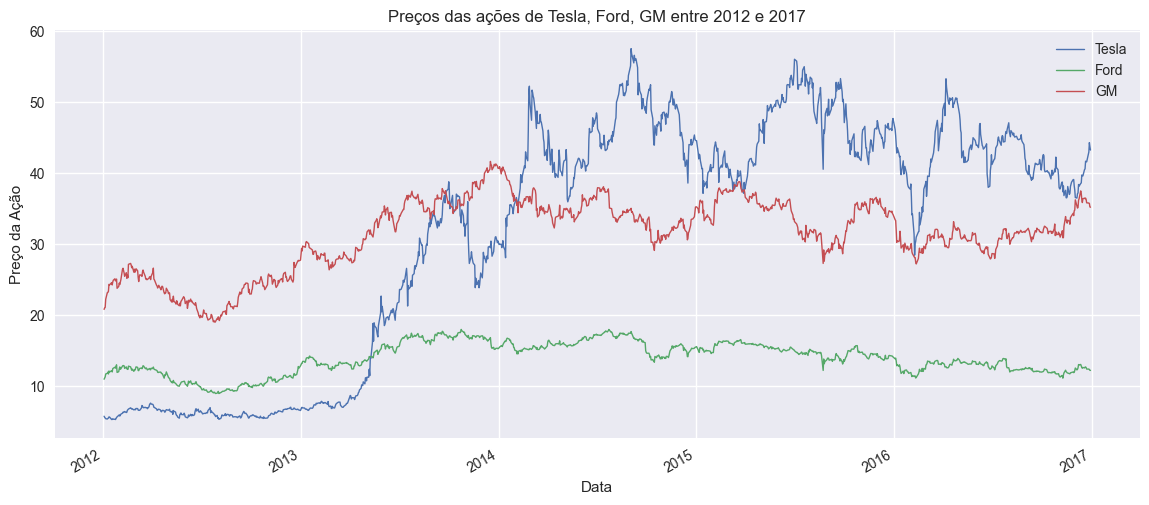

In [114]:
ax = plt.figure(figsize=(14, 6))
for df, name in zip([tesla, ford, gm], company_names):
    df['Open'].plot(label=name, lw=1)

plt.xlabel('Data')
plt.ylabel('Preço da Ação')
plt.title(f"Preços das ações de {', '.join(company_names)} entre {start.year} e {end.year}")
plt.legend()
plt.show()

Por sua vez, o volume de ações negociado por cada empresa nesse período pode ser visualizado no próximo gráfico:

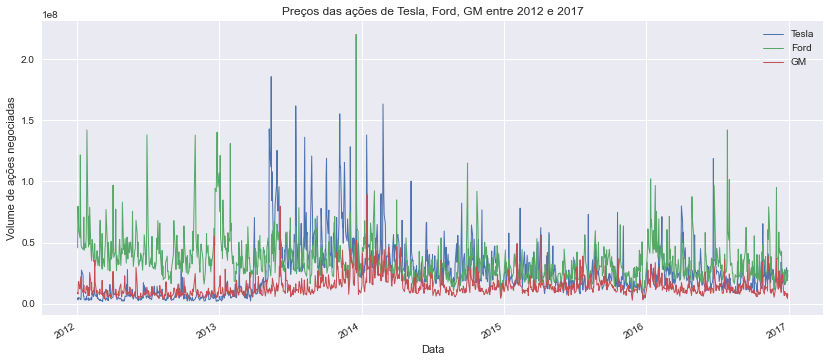

In [47]:
plt.figure(figsize=(14,6))
for df, name in zip([tesla, ford, gm], company_names):
    df['Volume'].plot(label=name, lw=1)
plt.xlabel('Data')
plt.ylabel('Volume de ações negociadas')
plt.title(f"Preços das ações de {', '.join(company_names)} entre {start.year} e {end.year}")
plt.legend()
plt.show()

Ao analsar o gráfico acima, percebe-se um pico no volume de vendas da Ford nos últimos dias do ano de 2013. O grande volume de negociações pode ser explicado pelo anúncio feito pela empresa de que sua margem de lucro cairiam no ano seguinte (2014) (https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/).

In [36]:
ford.iloc[[ford['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-18,15.99,16.0,15.17,15.65,10.981932,220363000


Em razão desse fato, a quantidade de ações da empresa Ford ofertadas aumentou drasticamente e o preço da açõo apresentou queda entre o final de 2013 e inpicio de 2014, como se observa no gráfico seguinte.

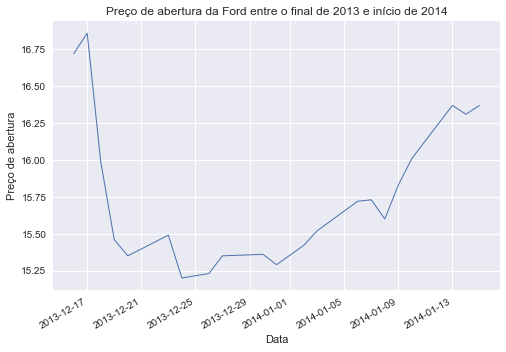

In [43]:
ax = ford['2013-12-15':'2014-01-15']['Open'].plot(lw=1)
ax.set_xlabel('Data')
ax.set_ylabel('Preço de abertura')
ax.set_title('Preço de abertura da Ford entre o final de 2013 e início de 2014')
plt.show()

## Valor de Mercado (_Market Cap_)

In [44]:
for df, name in zip([tesla, ford, gm], company_names):
    df['Total Traded'] = df['Open'] * df['Volume']

In [45]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500,2.685921e+07
2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500,1.777512e+07
2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500,2.791268e+07
2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500,2.682736e+07
2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000,2.421900e+07


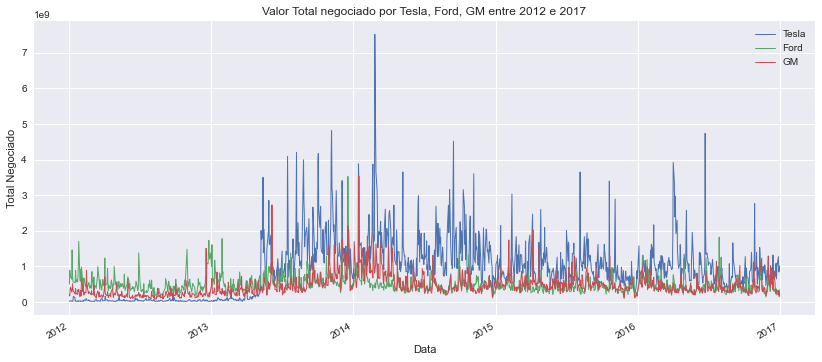

In [50]:
plt.figure(figsize=(14, 6))
for df, name in zip([tesla, ford, gm], company_names):
    df['Total Traded'].plot(label=name, lw=1)
plt.xlabel('Data')
plt.ylabel('Total Negociado')
plt.title(f"Valor Total negociado por {', '.join(company_names)} entre {start.year} e {end.year}")
plt.legend()
plt.show()

Novamente, encontramos um valor que se destada dos demais. Entretando, neste caso o pico refere-se à empresa Tesla e tem as seguintes características:

In [51]:
tesla.iloc[[tesla['Total Traded'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2014-02-25,46.0,51.84,45.689999,49.599998,49.599998,163408500,7.516791e+09


O pico no valor total ocorreu em 25 de fevereiro de 2014. Segundo o site https://money.cnn.com/2014/02/10/investing/tesla-stock-china/index.html:
> As ações da Tesla Motors subiram para um recorde na segunda-feira, depois que o Ministério das Finanças da China anunciou subsídios mais altos do que o esperado para carros elétricos comprados lá.

## Média móvel

A média móvel é um método bastante comum para suavisação de uma série temporal a fim de tornar os dados mais confiáveis em relação ao ruído.

In [53]:
for df, name in zip([tesla, ford, gm], company_names):
    for win in [20, 50]:
        df[f'MA{win}'] = df['Open'].rolling(win).mean()

In [55]:
gm.tail()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA20,MA50
Date,,,,,,,,,
2016-12-23,35.830002,35.869999,35.540001,35.689999,31.217712,9351200,3.350535e+08,35.8550,33.6438
2016-12-27,35.799999,35.930000,35.500000,35.540001,31.086514,6008700,2.151115e+08,35.9275,33.7246
2016-12-28,35.740002,35.799999,35.130001,35.150002,30.745386,8451900,3.020709e+08,36.0130,33.8026
2016-12-29,35.250000,35.480000,35.119999,35.139999,30.736635,4416700,1.556887e+08,36.0405,33.8710
2016-12-30,35.209999,35.310001,34.669998,34.840000,30.474236,7646100,2.692192e+08,36.0605,33.9444


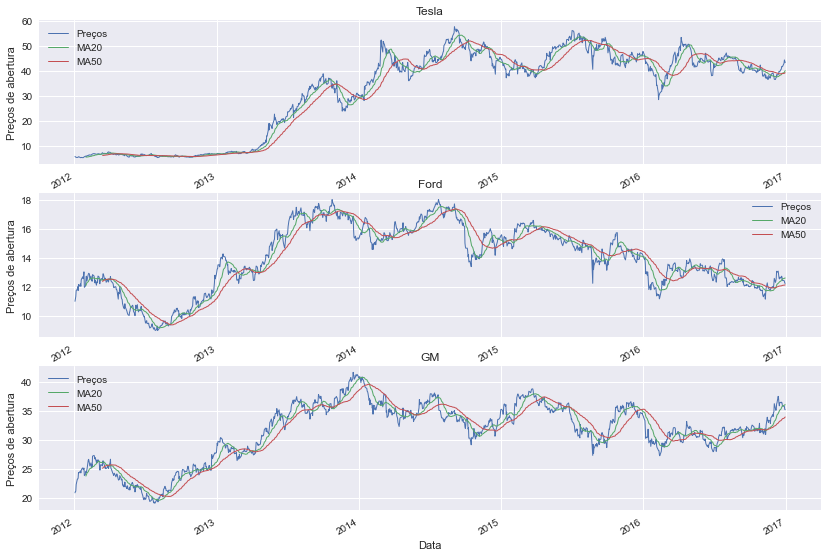

In [83]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14, 10))
for df, name, i in zip([tesla, ford, gm], company_names, range(len(company_names))):
    df['Open'].plot(label = 'Preços', lw = 1, ax = ax[i], legend = True)
    for win in [20, 50]:
        df[f'MA{win}'].plot(label = f'MA{win}', lw = 1, ax = ax[i], legend = True)
    ax[i].set_ylabel('Preços de abertura')
    ax[i].set_title(f'{name}')
plt.xlabel('Data')
plt.show()

Note-se que a comparação entre as duas médias móveis permite identificar as tendências de crescimento ou queda no valor das ações. De fato, sejam **MA20** e **MA50** as médias móveis com janelas iguais a 20  e 50 dias, respectivamente. Quando a linha gráfica da média de maior janela (**MA50**) está sobre a linha gráfica da média de menor janela (**MA20**), o preço da ação está em tentência de queda. Inversamente, quando a linha gráfica da média de maior janela (**MA50**) está abaixo da linha gráfica da média de menor janela (**MA20**), o preço da ação está em tentência de alta. 

Saliente-se a metodologia descrita acima é uma técnica rudimentar de análise devendo sempre que possível ser acompanhada de técnicas mais avançadas de predição.

## Correlação e matriz de dispersão

Nesta seção, foca-se nos preços de abertura das três companhias. Neste sentido, será criado um novo _dataframe_ composto pela concatenação da coluna `Open` de dada um dos conjuntos de dados.

In [85]:
car_comp = pd.concat([tesla['Open'], ford['Open'], gm['Open']], axis=1)

In [90]:
car_comp.columns = [f"{name} Open" for name in company_names]
car_comp.head()

,Tesla Open,Ford Open,GM Open
Date,,,
2012-01-03,5.788,11.00,20.830000
2012-01-04,5.642,11.15,21.049999
2012-01-05,5.552,11.33,21.100000
2012-01-06,5.440,11.74,22.260000
2012-01-09,5.400,11.83,23.200001


Finalmente, a correlação ente os preços de abertura de cada companhia é dada pela seguinte matriz de dispersão:

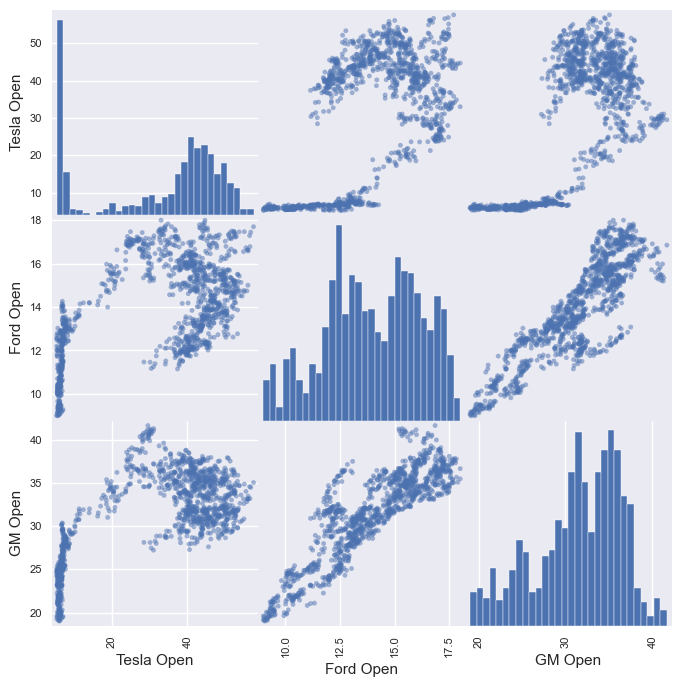

In [131]:
scatter_matrix(car_comp, figsize=(8,8), hist_kwds={'bins':30, 'edgecolor':'white'})
plt.show()

Nota-se que as variáveis `Ford Open` e `GM Open` estão mais fortemente correlacionadas entre si do que com a variável `Tesla Open`.

De fato, aplicando o método `corr` para imprimir uma matriz com os valores das correlações entre as três variáveis, obtém-se:

In [137]:
car_comp.corr()

,Tesla Open,Ford Open,GM Open
Tesla Open,1.000000,0.569045,0.678294
Ford Open,0.569045,1.000000,0.867685
GM Open,0.678294,0.867685,1.000000


Esse resultado provavelmente se explica pela fonte de energia utilizada nos carros de cada uma das empresas: Combústíveis a base de petróleo no caso da Ford e GM e Energia Elétrica para os carros da Tesla.

## Gráficos do tipo _Candlestick_

In [174]:
ford_reset = ford.loc['2012-01':'2012-01'].reset_index()

ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]



mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

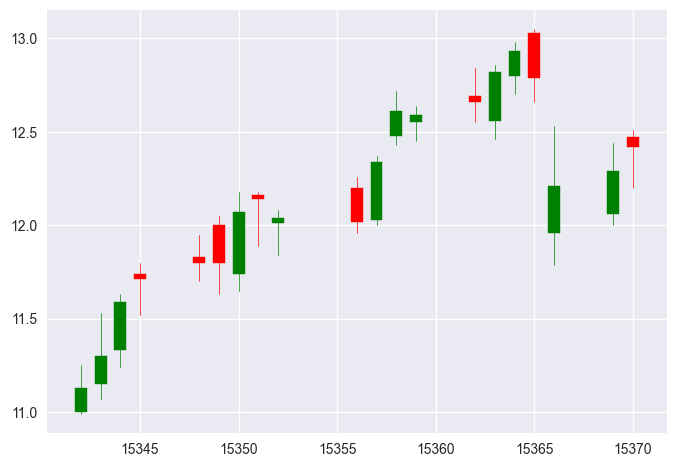

In [172]:
fig, ax = plt.subplots()
candlestick_ohlc(ax, ford_values, width=0.6, colorup='g')
plt.show()

## Retorno Simples Diário

$$r_t = \dfrac{P_t}{P_{t-1}} - 1$$

In [182]:
for df in [tesla, ford, gm]:
    df['Simple Return'] = (df['Close'] / df['Close'].shift(1)) - 1

In [183]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA20,MA50,Simple Return
Date,,,,,,,,,,
2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500,2.685921e+07,NaN,NaN,NaN
2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500,1.777512e+07,NaN,NaN,-0.013177
2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500,2.791268e+07,NaN,NaN,-0.021292
2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500,2.682736e+07,NaN,NaN,-0.007743
2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000,2.421900e+07,NaN,NaN,0.012635


## Volatilidade

$$V[X] = \sigma_X^2$$

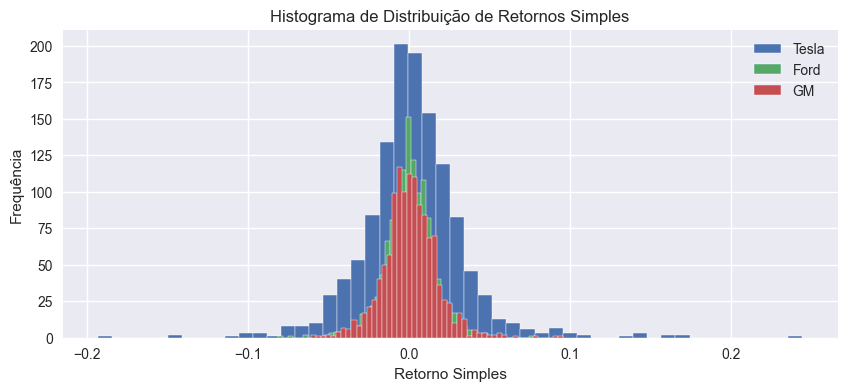

In [219]:
fig, ax = plt.subplots(figsize=(10, 4))
for df, name in zip([tesla, ford, gm], company_names):
    df['Simple Return'].hist(bins=50, edgecolor='white', label=name)

plt.legend()
plt.xlabel('Retorno Simples')
plt.ylabel('Frequência')
plt.title('Histograma de Distribuição de Retornos Simples')
plt.show()

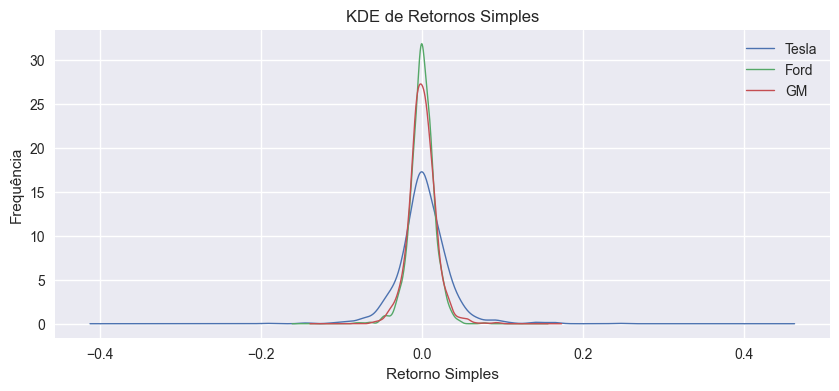

In [222]:
fig, ax = plt.subplots(figsize=(10, 4))
for df, name in zip([tesla, ford, gm], company_names):
    df['Simple Return'].plot(kind='kde', label=name, lw=1)

plt.legend()
plt.xlabel('Retorno Simples')
plt.ylabel('Frequência')
plt.title('KDE de Retornos Simples')
plt.show()

## Boxplots

In [228]:
box_df = pd.concat([tesla['Simple Return'], ford['Simple Return'], gm['Simple Return']], axis=1)
box_df.dropna(inplace=True)
box_df.columns = company_names

In [229]:
box_df.head()

,Tesla,Ford,GM
Date,,,
2012-01-04,-0.013177,0.015274,0.004751
2012-01-05,-0.021292,0.025664,0.048227
2012-01-06,-0.007743,0.010354,0.033829
2012-01-09,0.012635,0.007686,-0.003490
2012-01-10,0.013578,0.000000,0.017513


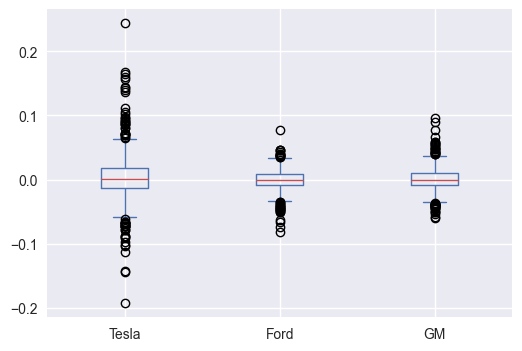

In [232]:
box_df.plot(kind='box', figsize=(6,4))
plt.show()

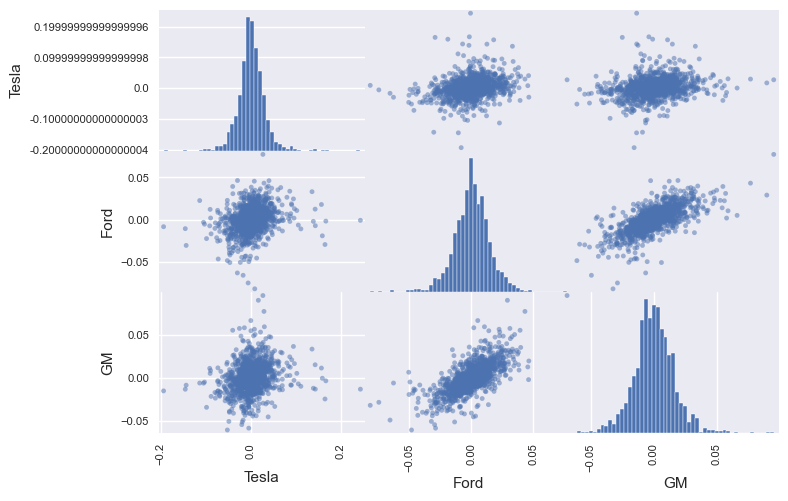

In [235]:
scatter_matrix(box_df, hist_kwds={'bins':50, 'edgecolor':'white'})
plt.show()

## Retorno Cumulativo

$$i_t = (1 + r_t) \cdot i_{t-1} = \left(1 + \dfrac{P_t}{P_{t-1} - 1}\right) \cdot i_{t-1} = \dfrac{P_t}{P_{t-1}} \cdot i_{t-1}$$

In [236]:
for df in [tesla, ford, gm]:
    df['Cumulative Return'] = (1 + df['Simple Return']).cumprod()

In [237]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA20,MA50,Simple Return,Cumulative Return
Date,,,,,,,,,,,
2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500,2.685921e+07,NaN,NaN,NaN,NaN
2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500,1.777512e+07,NaN,NaN,-0.013177,0.986823
2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500,2.791268e+07,NaN,NaN,-0.021292,0.965812
2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500,2.682736e+07,NaN,NaN,-0.007743,0.958333
2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000,2.421900e+07,NaN,NaN,0.012635,0.970442


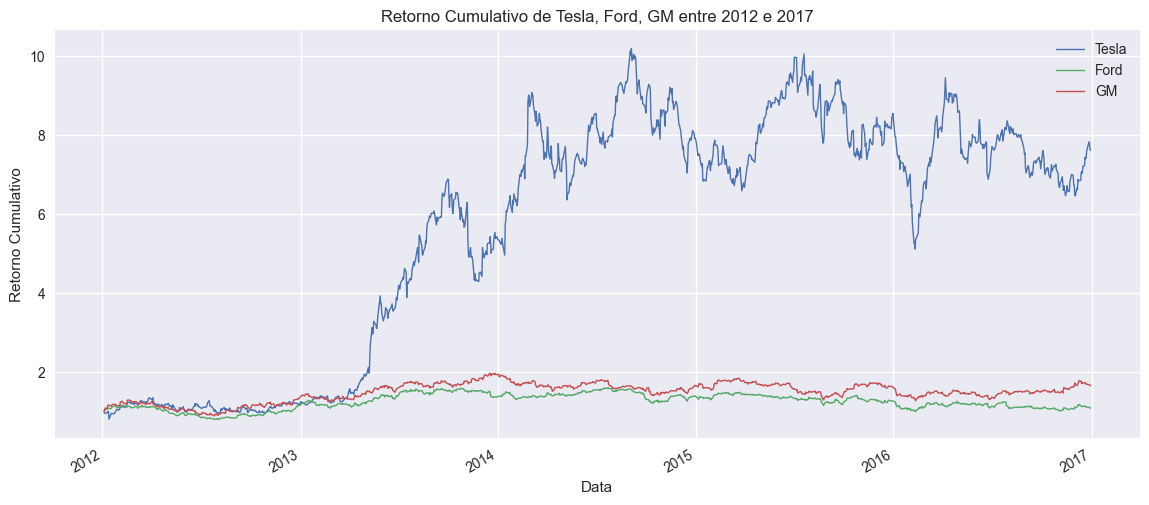

In [238]:
plt.figure(figsize=(14, 6))
for df, name in zip([tesla, ford, gm], company_names):
    df['Cumulative Return'].plot(label=name, lw=1)
plt.xlabel('Data')
plt.ylabel('Retorno Cumulativo')
plt.title(f"Retorno Cumulativo de {', '.join(company_names)} entre {start.year} e {end.year}")
plt.legend()
plt.show()